In [40]:
import pandas as pd
from oracle import oracleTopd

data = oracleTopd('select * from test_recipe_table')

In [41]:
data.shape

(166511, 13)

In [30]:
from embedding import convert_fraction_to_float, convert_unit_to_number

ingredient_columns = toy.filter(like='ingredient').drop(columns=['recipe_ingredients']) # 'ingredient'가 포함된 모든 열 선택
all_ingredients = [item for sublist in ingredient_columns.values for item in sublist if pd.notna(item)] # 각 행의 ingredient 값을 하나의 리스트로 결합

In [32]:
for i in range(1, 25):
    toy.loc[:, f'ingredient{i}'] = None
    toy.loc[:, f'quantity{i}'] = None
    toy.loc[:, f'unit{i}'] = None

C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_40980\2586743089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toy.loc[:, f'ingredient{i}'] = None
C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_40980\2586743089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toy.loc[:, f'quantity{i}'] = None
C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_40980\2586743089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [34]:
all_ingredients = set()
for i in range(1, 25):  
    all_ingredients.update(toy[f'ingredient{i}'].dropna().unique())

recipe_ingredients_df = pd.DataFrame(columns=list(all_ingredients))

In [36]:
toy

,recipe_title,recipe_ingredients,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,...,unit21,ingredient22,quantity22,unit22,ingredient23,quantity23,unit23,ingredient24,quantity24,unit24
0,환상의 조합과 식감인! 소고기청경채볶음,"{'재료': ['쇠고기30g', '청경채1포기', '양파1/2개', '홍고추1/2개...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,오징어 쪽파 볶음,"{'재료': ['오징어1마리', '쪽파10줄기', '양파1/4개', '풋고추2개',...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,하와이 현지보다 더 맛있는 하와이안 갈릭 버터 쉬림프 만들기!,"{'재료': ['새우3-4cups', '빵가루1/2cup', '무염버터8T', '양...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,돼지고기볶음 곤약 넣어서 만들었어요,"{'재료': ['시판용양념돼지고기600g', '곤약1개', '양파1개', '대파1개...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,소불고기 시판용양념에 추가 양념을 더하다,"{'재료': ['소불고기감', '시판용양념', '양파', '당근', '새송이버섯',...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,두부 묵은지 지짐 만들기,"{'재료 ': ['신김치1/4포기', '돼지고기600g', '두부1모', '양파1개...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
996,인도네시아 돼지고기 요리 : 바비 삼발 마타 / babi sambal matah,"{'재료': ['양파2개', '매운고추2개', '마늘3톨', '돼지고기300g', ...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
997,"특별한 메뉴 두부 깐풍기 ,, 두부요리 황금레시피 레시피~!","{'재료': ['두부1모', '전분가루1/2컵(종이컵)', '대파1큰술', '청양고...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
998,참치캔 강된장 비빔밥,"{'재료': ['참치캔1개', '대파1/2줄기', '양파1/2개', '청양고추4개'...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [35]:
recipe_rows = []
for idx, row in toy.iterrows():
    recipe_data = {ingredient: 0.0 for ingredient in all_ingredients}  # 모든 식재료를 None으로 초기화
    for i in range(1, 21):  
        ingredient = row[f'ingredient{i}']
        quantity = row[f'quantity{i}']
        unit = row[f'unit{i}']
        if pd.notna(ingredient) and pd.notna(quantity):
            quantity_float = convert_fraction_to_float(quantity)
            if quantity_float is not None:
                unit_number = convert_unit_to_number(unit) if pd.notna(unit) else 1
                recipe_data[ingredient] = quantity_float * unit_number
    recipe_rows.append(recipe_data)

# 새로운 데이터프레임 생성 (모든 식재료를 열로 가짐)
recipe_ingredients_df = pd.concat([pd.DataFrame([row]) for row in recipe_rows], ignore_index=True)

recipe_ingredients_df = recipe_ingredients_df.astype('float64')



In [27]:
recipe_ingredients_df 

,후추가루약간,대파(흰부분),고기버섯,당근(선택재료),소금(죽염),무채,새우젓국물없이,다용도맛간장,볶음용잔멸치,땅콩적당량,...,콩나물한봉지,녹차유,절임소금,무김치,발사믹식초,비정제설탕,건새우한봉지,건새우소복하게,식용유조금,올리고당(물엿)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
recipe_ingredients_df.isna().sum()

후추가루약간      0
대파(흰부분)     0
고기버섯        0
당근(선택재료)    0
소금(죽염)      0
           ..
비정제설탕       0
건새우한봉지      0
건새우소복하게     0
식용유조금       0
올리고당(물엿)    0
Length: 864, dtype: int64

### SVD

In [14]:
import numpy as np

a, b, c= np.linalg.svd(recipe_ingredients_df, full_matrices= True)

result = a[:, :100].dot(np.diag(b[:100]))

result2 = result.dot(result.T)/(np.linalg.norm(result, axis =1)*np.linalg.norm(result.T, axis = 0)) # 정규화 해줘야 함

In [86]:
toy.iloc[2, :]

recipe_title                                              백종원의 부추 달걀 볶음
recipe_ingredients    {'재료': ['부추1줌', '달걀4개', '식용유2큰술', '밥2공기'], '양념...
ingredient1                                                          부추
quantity1                                                             1
unit1                                                                 줌
                                            ...                        
quantity19                                                          NaN
unit19                                                              NaN
ingredient20                                                        NaN
quantity20                                                          NaN
unit20                                                              NaN
Name: 2, Length: 62, dtype: object

In [85]:
toy.iloc[233, :]

recipe_title                                                 애호박 새우젓 볶음
recipe_ingredients    {'재료': ['애호박', '마늘', '양파', '대파'], '양념': ['고춧가루...
ingredient1                                                         애호박
quantity1                                                           NaN
unit1                                                               NaN
                                            ...                        
quantity19                                                          NaN
unit19                                                              NaN
ingredient20                                                        NaN
quantity20                                                          NaN
unit20                                                              NaN
Name: 233, Length: 62, dtype: object

In [83]:
result2[2].argsort()

array([233, 385,  28, 137, 130, 112, 566, 228, 683, 631, 804, 304, 889,
       852, 144, 860, 892, 520, 858, 887, 240, 786, 744, 328, 134, 258,
       788, 914, 277,  10, 402, 913, 446, 256, 225, 754,  51, 981, 807,
       907, 506, 284, 460, 820,  85, 996, 692, 320, 826,  23, 293, 493,
       418, 567,  29,  34,  99, 174, 432, 526, 548, 337, 166, 640, 919,
        36, 296, 800, 298, 601, 661, 515, 672, 979, 403, 865, 307, 406,
       674, 736, 483, 606,  27, 591, 218, 603, 910, 143, 669, 954, 639,
       876, 957, 861,  86, 482, 810, 908, 480, 975, 552, 388, 339, 254,
       410, 458, 325, 821, 670, 395,  50,  73, 967, 972,  91, 109, 165,
        56, 762, 646, 537, 152, 380, 585, 624, 682, 763,  37, 286, 349,
       790, 445, 665, 974, 774, 127, 401, 594, 252,  54, 579, 309, 502,
       888, 161, 189, 297, 776, 326, 799, 313, 997, 117, 733, 138, 352,
       455, 950, 287, 456, 756, 362,  26, 615,  13, 961, 463, 191, 368,
       121,  30, 350,  84, 568, 833, 946, 983, 634, 731, 745, 34

In [88]:
result = np.diag(b[:100]).dot(c[:100]).T

In [89]:
result_c = result.dot(result.T)/(np.linalg.norm(result, axis =1)*np.linalg.norm(result.T, axis = 0))

C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_10564\226570040.py:1: RuntimeWarning: invalid value encountered in divide
  result_c = result.dot(result.T)/(np.linalg.norm(result, axis =1)*np.linalg.norm(result.T, axis = 0))


In [95]:
list(recipe_ingredients_df.columns)[2]

'양파'

In [107]:
list(recipe_ingredients_df.columns)[217]

'깨조금'

In [90]:
result_c[2].argsort()

array([227, 226, 217,  29,  10,  27, 196, 207,  83,  47,  49, 138,  20,
       177, 137,  60,  57,  89, 126,  93, 103,  70, 116, 119, 114,  95,
       136, 164,  42, 185, 147, 153, 179, 150, 162, 198, 788, 161, 528,
       121, 186,  73,  59,  30, 488, 519, 639, 486, 225, 284, 587, 411,
       776, 799, 608, 598, 109, 679, 281, 634,  68,  38, 365, 526,  74,
       117, 310, 588, 182, 462, 490,  46, 401, 826, 276, 237, 274, 653,
       684,  18, 102, 134, 286, 730, 106, 430, 853, 533, 278, 705, 443,
        96, 320, 792, 701,  22, 796, 575, 249, 341, 668, 724, 368, 381,
       447, 130, 262, 318, 518, 571, 184, 839, 247,  79, 770, 364, 584,
       408, 562, 579, 442, 793, 852,  86, 149, 350, 667, 638, 714, 560,
       230, 475, 473, 718, 459, 550, 811, 585, 708, 206, 497, 741, 152,
       204, 292, 374, 557, 496, 516, 189, 795, 637, 200, 603, 747, 455,
       858, 821,  76, 521,  21, 244, 141, 337,  43, 651, 845, 202, 656,
       831, 732, 686, 183,  97, 748, 702,  67, 536, 440, 168, 73

In [99]:
result = a[:, :2].dot(np.diag(b[:2]))

In [103]:
result 

array([[-1.12281872e-01,  2.77870316e-02],
       [-9.61647860e-03,  4.76598236e-03],
       [-4.54037855e-03,  1.58440713e-03],
       ...,
       [-1.79049703e+00,  2.20895726e+00],
       [-5.98225730e-01,  2.64495843e-01],
       [-3.56100223e-03,  1.18584492e-02]])

In [106]:
result

array([[-1.12281872e-01,  2.77870316e-02],
       [-9.61647860e-03,  4.76598236e-03],
       [-4.54037855e-03,  1.58440713e-03],
       ...,
       [-1.79049703e+00,  2.20895726e+00],
       [-5.98225730e-01,  2.64495843e-01],
       [-3.56100223e-03,  1.18584492e-02]])

C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_40980\1422094236.py:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(result[:, 0]), np.log(result[:, 1]))
C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_40980\1422094236.py:3: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(result[:, 0]), np.log(result[:, 1]))


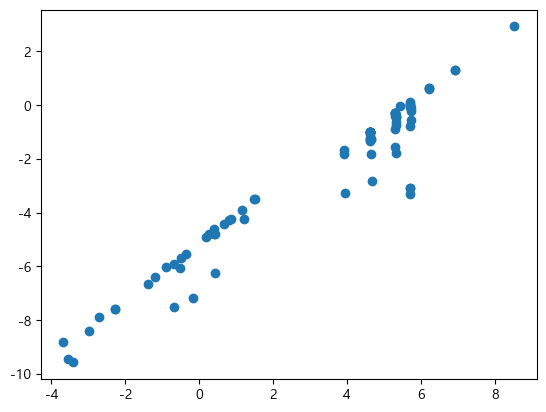

In [39]:
import matplotlib.pyplot as plt

plt.scatter(np.log(result[:, 0]), np.log(result[:, 1]))

#싸이킷런, 정규화, 